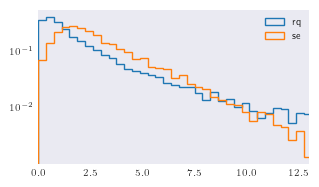

In [22]:
import numpy as np
import imageio
import sys
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
imageio.plugins.freeimage.download()
import scipy.stats as st
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import gaussian_kde

with plt.style.context("seaborn-v0_8-dark"):
    params = {'text.usetex' : True,
            'font.size' : 7,
            'font.family' : 'Linux Libertine'}
    plt.rcParams.update(params)

    fig, ax = plt.subplots(figsize=(3.5, 2))
    ax.set_yscale("log")
    ax.set_xlim(0, 13)

    t = np.linspace(0, 6, 100)
    dt = t[1]-t[0]

    for file in glob.glob("*/*l=1.0*-pp.bin"):
        ts = np.reshape(np.fromfile(file, dtype=np.float32), (-1))

        #ts = ts[ts < 10]
        density = gaussian_kde(ts)

        fp = density(t)
        #ax.plot(t, fp)
        ax.hist(ts, histtype="step", bins=40, density=True, label=file[:2])

        # ff = 1-np.cumsum(fp)*dt

        # L0 = 1
        # L2 = 1
        # u = 0

        # collDensity = np.sqrt(L2) / np.pi

        # num_mfp = np.sum(t*fp)*dt
        # plt.vlines(num_mfp, 0, 1, color="green")
        # plt.vlines(collDensity, 0, 1, color="red")

        # plt.plot(t, ff)

        # plt.plot(t, np.exp(-t/num_mfp))

        # plt.title(file)
        # plt.show()
    ax.legend()
